# Energy Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [3]:
import pandas as pd
import numpy as np

In [4]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/renewable-energy-data-scrapping.csv'

df_energy = pd.read_csv(url)

In [5]:
df_energy.tail(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21887,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21888,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21889,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## Filtering the rows and columns

Selecting the columns that contain information about renewable energy production 

In [6]:
columns_to_keep = ['country', 
                   'year', 
                   'iso_code', 
                   'coal_elec_per_capita', 
                   'oil_elec_per_capita', 
                   'gas_elec_per_capita', 
                   'hydro_elec_per_capita', 
                   'nuclear_elec_per_capita', 
                   'biofuel_elec_per_capita', 
                   'other_renewables_elec_per_capita_exc_biofuel', 
                   'solar_elec_per_capita', 
                   'wind_elec_per_capita']

columns_to_drop = list(set(df_energy.columns) - set(columns_to_keep))
df_energy_filtered1 = df_energy.drop(columns=columns_to_drop)

In [7]:
df_energy_filtered1.head(3)

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita
0,Afghanistan,1900,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning rows from years previous to 2000

In [8]:
df_energy_filtered2 = df_energy_filtered1[df_energy_filtered1.year > 1999].reset_index()

In [9]:
df_energy_filtered2.shape

(6457, 13)

## Cleaning rows related to regions (not countries)

Removing the data points related to regions, as we intend to do the analysis on countries

In [10]:
# All countries have a respective 'iso_code', so we will remove the ones that do note have one
df_energy_filtered_countries_only = df_energy_filtered2.dropna(subset=['iso_code'])

In [11]:
df_energy_filtered_countries_only.shape

(4814, 13)

## Creating column with total production of energy

We are not using this at first!!! (This was supposed to be used if we had a lot of zeros/NaNs using the sources sepparated)

In [10]:
# df_energy_filtered_countries_only.loc[:, 'total_renewable_electricity'] = df_energy_filtered_countries_only[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']].sum(axis=1)

In [11]:
# df_energy_filtered_countries_only.head()

In [12]:
# count_sum_equals_zero = (df_energy_filtered_countries_only.total_renewable_electricity == 0).sum()/len(df_energy_filtered)
# count_sum_equals_zero

## Analyzing missing values

How many NaNs we have for each feature?

In [12]:
df_energy_filtered_countries_only.isnull().sum()/len(df_energy_filtered_countries_only)

index                                           0.000000
country                                         0.000000
year                                            0.000000
iso_code                                        0.000000
biofuel_elec_per_capita                         0.047570
coal_elec_per_capita                            0.043000
gas_elec_per_capita                             0.043000
hydro_elec_per_capita                           0.029290
nuclear_elec_per_capita                         0.021811
oil_elec_per_capita                             0.043000
other_renewables_elec_per_capita_exc_biofuel    0.052971
solar_elec_per_capita                           0.027005
wind_elec_per_capita                            0.029082
dtype: float64

In [14]:
## creates a dictionary with all features and the respective amount of Zeros for each
# countries = df_energy_filtered.country.unique()
# missing_values_dict = {}
# for country in countries:
#     percentage_missing_values = ((df_energy_filtered.country == country) & (df_energy_filtered.total_renewable_electricity == 0)).sum()\
#     /len(df_energy_filtered[df_energy_filtered.country == country])
#     missing_values_dict[country] = percentage_missing_values
# missing_values_dict

# Economic Growth Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [13]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/World_Development_Indicators.xlsx'

df_gdp = pd.read_excel(url)

In [5]:
df_gdp.to_csv('home/full_cleaned_final_train.csv')

OSError: Cannot save file into a non-existent directory: 'home'

In [14]:
df_gdp.head(3)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Brazil,BRA,6086.08487,6745.865881,9216.14336,9183.470768,8783.225984,8426.853352,...,3304.860245,3095.225632,2892.687723,2850.904774,2746.261344,2758.866607,2746.517052,2811.630814,2717.004894,2578.432125
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,..,..,608.386715,602.516979,592.476537,590.427739,...,..,..,..,..,..,..,..,..,..,..
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,1606.296047,1960.881946,3780.698202,3855.759734,3952.802538,4090.371657,...,..,..,..,..,..,..,..,..,..,..


## Filtering the rows and columns

In [15]:
df_gdp_filtered = df_gdp.drop(columns=['Series Name', 'Series Code'])

In [16]:
df_gdp_filtered.shape

(266, 65)

## Flattening the years to be in one column (instead of one column per year)

Moving the year columns to become lines respective to their country.<br>
We will use this to merge with the Energy dataset

In [17]:
df_gdp_filtered_flattened = pd.melt(df_gdp_filtered, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP_per_capita')

In [18]:
df_gdp_filtered_flattened.head(3)

,Country Name,Country Code,Year,GDP_per_capita
0,Brazil,BRA,1990 [YR1990],6086.08487
1,Afghanistan,AFG,1990 [YR1990],..
2,Albania,ALB,1990 [YR1990],1606.296047


## Turning 'Year' column into an int

Removing the brackets string in the Year column and turning it into an integer

In [19]:
df_gdp_filtered_flattened['Year'] = df_gdp_filtered_flattened['Year'].str.extract(r'(\d{4})').astype(int)

In [20]:
df_gdp_filtered_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    16758 non-null  object
 1   Country Code    16758 non-null  object
 2   Year            16758 non-null  int64 
 3   GDP_per_capita  16758 non-null  object
dtypes: int64(1), object(3)
memory usage: 523.8+ KB


Renaming the columns so they match the ones in the Energy dataset, easing the merge

In [21]:
df_gdp_filtered_flattened.rename(columns={"Year": "year", "Country Code": "iso_code"}, inplace=True)

# Merging the features and target datasets

In [25]:
full_df = pd.merge(df_energy_filtered_countries_only, df_gdp_filtered_flattened, on=['year', 'iso_code'], how='left')

In [26]:
full_df.drop(columns=['index', 'Country Name'], inplace=True)

In [27]:
full_df.sample(8)

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
4636,Uruguay,2020,URY,326.618,0.0,635.738,1192.737,0.0,64.157,0.0,134.146,1598.093,15197.958924
3535,Qatar,2010,QAT,0.000,0.0,15441.969,0.000,0.0,0.000,0.0,0.000,0.000,68253.065889
1429,Ethiopia,2019,ETH,0.263,0.0,0.000,118.822,0.0,0.088,0.0,0.175,5.345,785.48505
1472,Faroe Islands,2018,FRO,0.000,0.0,0.000,2157.793,0.0,3334.772,0.0,0.000,1176.978,..
1889,Guinea-Bissau,2013,GNB,0.000,0.0,0.000,0.000,0.0,17.670,0.0,0.000,0.000,576.179885
67,American Samoa,2002,ASM,0.000,0.0,0.000,0.000,0.0,2920.962,0.0,0.000,0.000,12804.435844
4496,Uganda,2012,UGA,1.459,0.0,0.000,43.766,0.0,11.087,0.0,0.875,0.000,825.121815
3352,Panama,2005,PAN,9.075,0.0,0.000,1116.195,0.0,589.859,0.0,0.000,0.000,7872.785493


# Treating the raw dataset

## Removing the countries with 'NaN's in 'GDP_per_capita' (target)

In [28]:
# The countries we remove here do not affect our model
regions_to_remove = full_df['country'][full_df.GDP_per_capita.isna()].unique()
regions_to_remove

array(['Antarctica', 'Cook Islands', 'Falkland Islands', 'French Guiana',
       'Guadeloupe', 'Martinique', 'Montserrat', 'Netherlands Antilles',
       'Niue', 'Reunion', 'Saint Helena', 'Saint Pierre and Miquelon',
       'Taiwan', 'Western Sahara'], dtype=object)

In [29]:
full_df_gdpclean1 = full_df.dropna(subset=['GDP_per_capita']).reset_index(drop=True)
full_df_gdpclean1

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,0.000,0.0,15.862,0.0,8.187,0.0,0.000,0.0,..
1,Afghanistan,2001,AFG,0.000,0.000,0.0,25.395,0.0,4.571,0.0,0.000,0.0,..
2,Afghanistan,2002,AFG,0.000,0.000,0.0,26.666,0.0,6.190,0.0,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,0.000,0.0,27.821,0.0,13.689,0.0,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,0.000,0.0,23.776,0.0,14.011,0.0,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,Zimbabwe,2017,ZWE,21.693,204.730,0.0,269.132,0.0,2.034,0.0,0.678,0.0,1421.24077
4506,Zimbabwe,2018,ZWE,25.910,245.147,0.0,335.499,0.0,2.657,0.0,1.329,0.0,1462.59028
4507,Zimbabwe,2019,ZWE,24.748,235.760,0.0,271.580,0.0,2.605,0.0,1.954,0.0,1342.989587
4508,Zimbabwe,2020,ZWE,22.336,215.065,0.0,243.145,0.0,2.553,0.0,1.915,0.0,1213.117058


## Removing the countries with missing data in 'GDP_per_capita' (target)

Removing the countries that have more than 9 missing data in gdp

In [30]:
total_countries = full_df_gdpclean1['country'].unique()
no_gdp_countries = []

for i in total_countries:
    if full_df_gdpclean1['GDP_per_capita'][(full_df_gdpclean1.GDP_per_capita == '..') & (full_df_gdpclean1.country == i)].count() > 9:
        no_gdp_countries.append(i)

no_gdp_countries

['British Virgin Islands',
 'Djibouti',
 'Eritrea',
 'Faroe Islands',
 'Gibraltar',
 'New Caledonia',
 'North Korea',
 'Somalia',
 'Turks and Caicos Islands',
 'Venezuela']

In [31]:
full_df_gdpclean2 = full_df_gdpclean1[~full_df_gdpclean1['country'].isin(no_gdp_countries)].reset_index(drop=True)
full_df_gdpclean2

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,0.000,0.0,15.862,0.0,8.187,0.0,0.000,0.0,..
1,Afghanistan,2001,AFG,0.000,0.000,0.0,25.395,0.0,4.571,0.0,0.000,0.0,..
2,Afghanistan,2002,AFG,0.000,0.000,0.0,26.666,0.0,6.190,0.0,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,0.000,0.0,27.821,0.0,13.689,0.0,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,0.000,0.0,23.776,0.0,14.011,0.0,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,21.693,204.730,0.0,269.132,0.0,2.034,0.0,0.678,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,25.910,245.147,0.0,335.499,0.0,2.657,0.0,1.329,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,24.748,235.760,0.0,271.580,0.0,2.605,0.0,1.954,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,22.336,215.065,0.0,243.145,0.0,2.553,0.0,1.915,0.0,1213.117058


## Input value in missing data in target column

Inputing in the countries that have less than 10 missing data in gdp

In [32]:
# All the indexes of rows that have missing data
nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
nan_target_indexes

Index([   0,    1,   65,   66,  241,  396,  617,  750,  751,  752,  753,  754,
        755,  992, 1037, 1060, 1105, 1279, 1368, 1391, 1502, 1547, 1569, 1592,
       1593, 1790, 1923, 1968, 2122, 2189, 2300, 2323, 2478, 2714, 2715, 2716,
       2717, 2780, 2891, 2892, 3131, 3154, 3221, 3354, 3530, 3553, 3624, 3625,
       3626, 3627, 3628, 3629, 3652, 3741, 3785, 3982, 3983, 4114, 4115, 4135,
       4243, 4244, 4245],
      dtype='int64')

In [33]:
# Getting the parameters for calculating the average GDP to be inputed (MANUAL CALCULATION FOR THE 'get_parameters_input_gdp_mean' FUNCTION

# index = item.index[0]
# country = item.loc[index, 'country'] # Country of the input row
# year = item.loc[index, 'year'] # Year of the input row
# years = np.arange(year-5, year+6, 1) # Range of years used to calculate the mean
# years = np.delete(years, np.where(years == year))
# index, country, year, years

In [34]:
# Function for getting the parameters for calculating the average GDP to be inputed

def get_parameters_input_gdp_mean(nan_index):
    country = full_df_gdpclean2.loc[nan_index, 'country'] # Country of the input row
    year = full_df_gdpclean2.loc[nan_index, 'year'] # Year of the input row
    years = np.arange(year-6, year+7, 1) # Range of years used to calculate the mean
    years = np.delete(years, np.where(years == year))
    # index, country, year, years
    return country, years

In [35]:
# Function for calculating the mean value to be inputed

def calculate_input_gdp_mean(country, years):
    gdp_values = []
    for i in years:
        gdp = full_df_gdpclean2.loc[(full_df_gdpclean2['country'] == country) & (full_df_gdpclean2['year'] == i), 'GDP_per_capita']
        if not gdp.empty:
            gdp_value = pd.to_numeric(gdp.item(), errors='coerce')
            if type(gdp_value) == float:
                gdp_values.append(gdp_value)
                # print(gdp_values)
    
    input_gdp_mean = np.mean(gdp_values)
    # print(gdp_input)
    return input_gdp_mean

In [36]:
# Interating over the rows that have missing values in the target and inputing the calculated meand from +/- 6 years
for nan_target_indexe in nan_target_indexes:
    country, years = get_parameters_input_gdp_mean(nan_target_indexe)
    input_gdp_mean = calculate_input_gdp_mean(country, years)
    print(f'Inputed {round(input_gdp_mean)} GDP mean for {country} in {years[5] + 1}')
    full_df_gdpclean2.at[nan_target_indexe, 'GDP_per_capita'] = input_gdp_mean

Inputed 368 GDP mean for Afghanistan in 2000
Inputed 378 GDP mean for Afghanistan in 2001
Inputed 12943 GDP mean for American Samoa in 2000
Inputed 12958 GDP mean for American Samoa in 2001
Inputed 45228 GDP mean for Austria in 2022
Inputed 42023 GDP mean for Belgium in 2022
Inputed 7938 GDP mean for Bulgaria in 2022
Inputed 96180 GDP mean for Cayman Islands in 2000
Inputed 96232 GDP mean for Cayman Islands in 2001
Inputed 95211 GDP mean for Cayman Islands in 2002
Inputed 92416 GDP mean for Cayman Islands in 2003
Inputed 89837 GDP mean for Cayman Islands in 2004
Inputed 87930 GDP mean for Cayman Islands in 2005
Inputed 13533 GDP mean for Croatia in 2022
Inputed 26960 GDP mean for Cyprus in 2022
Inputed 19402 GDP mean for Czechia in 2022
Inputed 56386 GDP mean for Denmark in 2022
Inputed 19769 GDP mean for Estonia in 2022
Inputed 45361 GDP mean for Finland in 2022
Inputed 37583 GDP mean for France in 2022
Inputed 42485 GDP mean for Germany in 2022
Inputed 18382 GDP mean for Greece in 20

In [37]:
# Check if there are no more missing values in the target
check_nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
if check_nan_target_indexes.empty == True:
    print('Inputing succeded!')
else:
    print('not succeded')

Inputing succeded!


In [38]:
full_df_gdpclean2

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,0.000,0.0,15.862,0.0,8.187,0.0,0.000,0.0,368.187174
1,Afghanistan,2001,AFG,0.000,0.000,0.0,25.395,0.0,4.571,0.0,0.000,0.0,378.391401
2,Afghanistan,2002,AFG,0.000,0.000,0.0,26.666,0.0,6.190,0.0,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,0.000,0.0,27.821,0.0,13.689,0.0,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,0.000,0.0,23.776,0.0,14.011,0.0,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,21.693,204.730,0.0,269.132,0.0,2.034,0.0,0.678,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,25.910,245.147,0.0,335.499,0.0,2.657,0.0,1.329,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,24.748,235.760,0.0,271.580,0.0,2.605,0.0,1.954,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,22.336,215.065,0.0,243.145,0.0,2.553,0.0,1.915,0.0,1213.117058


At this point, we have the full dataset with with all target values filled

## Treating 'NaN's from the features

In [41]:
# Checking countries that have more than 20 NaN values in its features (>25%)

#columns = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity',
   #        'coal_electricity', 'fossil_electricity', 'gas_production', 'greenhouse_gas_emissions',
   #        'low_carbon_electricity', 'net_elec_imports', 'nuclear_electricity', 'oil_production',
   #        'primary_energy_consumption','hydro_consumption','per_capita_electricity','biofuel_elec_per_capita',
   #        'hydro_elec_per_capita','solar_elec_per_capita','wind_elec_per_capita']

columns = ['coal_elec_per_capita', 
            'oil_elec_per_capita', 
            'gas_elec_per_capita', 
            'hydro_elec_per_capita', 
            'nuclear_elec_per_capita', 
            'biofuel_elec_per_capita', 
            'other_renewables_elec_per_capita_exc_biofuel', 
            'solar_elec_per_capita', 
            'wind_elec_per_capita']

total_countries = full_df_gdpclean2['country'].unique()
no_energy_countries = []

for i in total_countries:
    mask = full_df_gdpclean2['country'] == i
    nan_sum = full_df_gdpclean2.loc[mask, columns].isna().sum().sum()
    if nan_sum > 20:
        no_energy_countries.append(i)
print(no_energy_countries)

['Bermuda', 'Chile', 'China', 'India', 'Iran', 'Kazakhstan', 'Malaysia', 'Micronesia (country)', 'Northern Mariana Islands', 'Saudi Arabia', 'Tuvalu', 'Vietnam']


In [42]:
# Dropping countries that have more than 20 NaN values in its features (>25%)
full_df_gdp_feat_clean = full_df_gdpclean2[~full_df_gdpclean2['country'].isin(no_energy_countries)].reset_index(drop=True)
full_df_gdp_feat_clean

,country,year,iso_code,biofuel_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,0.000,0.0,15.862,0.0,8.187,0.0,0.000,0.0,368.187174
1,Afghanistan,2001,AFG,0.000,0.000,0.0,25.395,0.0,4.571,0.0,0.000,0.0,378.391401
2,Afghanistan,2002,AFG,0.000,0.000,0.0,26.666,0.0,6.190,0.0,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,0.000,0.0,27.821,0.0,13.689,0.0,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,0.000,0.0,23.776,0.0,14.011,0.0,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,Zimbabwe,2017,ZWE,21.693,204.730,0.0,269.132,0.0,2.034,0.0,0.678,0.0,1421.24077
4028,Zimbabwe,2018,ZWE,25.910,245.147,0.0,335.499,0.0,2.657,0.0,1.329,0.0,1462.59028
4029,Zimbabwe,2019,ZWE,24.748,235.760,0.0,271.580,0.0,2.605,0.0,1.954,0.0,1342.989587
4030,Zimbabwe,2020,ZWE,22.336,215.065,0.0,243.145,0.0,2.553,0.0,1.915,0.0,1213.117058


In [43]:
full_df_gdp_feat_clean.isnull().sum()

country                                         0
year                                            0
iso_code                                        0
biofuel_elec_per_capita                         1
coal_elec_per_capita                            1
gas_elec_per_capita                             1
hydro_elec_per_capita                           0
nuclear_elec_per_capita                         2
oil_elec_per_capita                             1
other_renewables_elec_per_capita_exc_biofuel    1
solar_elec_per_capita                           0
wind_elec_per_capita                            0
GDP_per_capita                                  0
dtype: int64

In [44]:
# Filling remaining NaN values that were supposed to be zero (values from 2021 with all historical values equals to zero)
# full_df_gdp_feat_clean['biofuel_electricity'] = full_df_gdp_feat_clean['biofuel_electricity'].fillna(0)
# full_df_gdp_feat_clean['hydro_electricity'] = full_df_gdp_feat_clean['hydro_electricity'].fillna(0)
full_df_gdp_feat_clean['gas_elec_per_capita'] = full_df_gdp_feat_clean['gas_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['oil_production'] = full_df_gdp_feat_clean['oil_production'].fillna(0)
full_df_gdp_feat_clean['coal_elec_per_capita'] = full_df_gdp_feat_clean['coal_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['fossil_electricity'] = full_df_gdp_feat_clean['fossil_electricity'].fillna(0)
# full_df_gdp_feat_clean['greenhouse_gas_emissions'] = full_df_gdp_feat_clean['greenhouse_gas_emissions'].fillna(0)
# full_df_gdp_feat_clean['net_elec_imports'] = full_df_gdp_feat_clean['net_elec_imports'].fillna(0)
full_df_gdp_feat_clean['nuclear_elec_per_capita'] = full_df_gdp_feat_clean['nuclear_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['primary_energy_consumption'] = full_df_gdp_feat_clean['primary_energy_consumption'].fillna(0)
# full_df_gdp_feat_clean['hydro_consumption'] = full_df_gdp_feat_clean['hydro_consumption'].fillna(0)
# full_df_gdp_feat_clean['per_capita_electricity'] = full_df_gdp_feat_clean['per_capita_electricity'].fillna(0)
full_df_gdp_feat_clean['biofuel_elec_per_capita'] = full_df_gdp_feat_clean['biofuel_elec_per_capita'].fillna(0)
full_df_gdp_feat_clean['hydro_elec_per_capita'] = full_df_gdp_feat_clean['hydro_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['solar_elec_per_capita'] = full_df_gdp_feat_clean['solar_elec_per_capita'].fillna(0)
full_df_gdp_feat_clean['other_renewables_elec_per_capita_exc_biofuel'] = full_df_gdp_feat_clean['other_renewables_elec_per_capita_exc_biofuel'].fillna(0)
full_df_gdp_feat_clean['oil_elec_per_capita'] = full_df_gdp_feat_clean['oil_elec_per_capita'].fillna(0)


In [45]:
full_df_gdp_feat_clean.isnull().sum()

country                                         0
year                                            0
iso_code                                        0
biofuel_elec_per_capita                         0
coal_elec_per_capita                            0
gas_elec_per_capita                             0
hydro_elec_per_capita                           0
nuclear_elec_per_capita                         0
oil_elec_per_capita                             0
other_renewables_elec_per_capita_exc_biofuel    0
solar_elec_per_capita                           0
wind_elec_per_capita                            0
GDP_per_capita                                  0
dtype: int64

In [46]:
(full_df_gdp_feat_clean == 0).sum()/len(full_df_gdp_feat_clean)

country                                         0.000000
year                                            0.000000
iso_code                                        0.000000
biofuel_elec_per_capita                         0.493552
coal_elec_per_capita                            0.636657
gas_elec_per_capita                             0.507192
hydro_elec_per_capita                           0.252480
nuclear_elec_per_capita                         0.846230
oil_elec_per_capita                             0.142361
other_renewables_elec_per_capita_exc_biofuel    0.882688
solar_elec_per_capita                           0.629216
wind_elec_per_capita                            0.653026
GDP_per_capita                                  0.000000
dtype: float64

In [44]:
# full_df.to_csv('/home/pedroabisamara/code/final_project/cleaned_dataset.csv')

# Creating two versions of the treated dataset

Creates the version that will keep Zero values (*base*), and the one that will have 0.0001 inplace of Zero values (*final*)

In [47]:
full_cleaned_df_base = full_df_gdp_feat_clean
full_cleaned_df_final = full_df_gdp_feat_clean

## Checking year rows availability

Below we see that the count for year of the final dataset is unbalanced. Some countries do not have specific rows (not related to nan or 0 values).

In [48]:
pd.DataFrame(full_cleaned_df_final.year.value_counts()).sort_values('year')

,count
year,
2000,180
2001,180
2002,180
2003,181
2004,181
2005,182
2006,182
2007,182
2008,182


Next, let's check the countries with missing rows. 
Below is a sample of how to do it, and a for loop is used later to apply to all years and find the countries.

In [49]:
# The countries that have the year 2000
year_2000 = full_cleaned_df_final[full_cleaned_df_final.year==2000].country.unique()
year_2000

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guam', 'Guatemala', 'G

In [50]:
# All the countries available in the dataset
all_countries = full_cleaned_df_final.country.unique()
all_countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 'Guam', '

In [51]:
# Find the elements in array1 that are not in array2
diff1 = np.setdiff1d(all_countries, year_2000)
diff1

array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object)

So, 'East Timor', 'Montenegro', 'South Sudan' do not have year 2000. Now, let's apply it to all years:

In [52]:
dic_year = {}

for year in range(2000, 2023):
    specific_year_array = full_cleaned_df_final[full_cleaned_df_final.year==year].country.unique()
    diff1 = np.setdiff1d(all_countries, specific_year_array)
    dic_year[f'{year}']=diff1

dic_year
    

{'2000': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2001': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2002': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2003': array(['Montenegro', 'South Sudan'], dtype=object),
 '2004': array(['Montenegro', 'South Sudan'], dtype=object),
 '2005': array(['South Sudan'], dtype=object),
 '2006': array(['South Sudan'], dtype=object),
 '2007': array(['South Sudan'], dtype=object),
 '2008': array(['South Sudan'], dtype=object),
 '2009': array(['South Sudan'], dtype=object),
 '2010': array(['South Sudan'], dtype=object),
 '2011': array(['South Sudan'], dtype=object),
 '2012': array([], dtype=object),
 '2013': array([], dtype=object),
 '2014': array([], dtype=object),
 '2015': array([], dtype=object),
 '2016': array([], dtype=object),
 '2017': array([], dtype=object),
 '2018': array([], dtype=object),
 '2019': array([], dtype=object),
 '2020': array([], dtype=object),
 '2021': array(['A

Above we see that some countries don't have specific year rows. 

Considering that, an approach can be:

- Remove year 2022 from the dataset
- Impute a value for Albania (2021) and for 'East Timor' and 'Montenegro' (2000-2002), or simply remove them.
- Remove 'South Sudan'

## Removing some countries that trouble the dataset

I chose to remove them:

In [53]:
# Drop the rows corresponding to South Sudan
# Define a list of countries to remove
countries_to_remove = ['South Sudan',  'East Timor', 'Montenegro', 'Albania']

# Remove the rows corresponding to the specified countries
df_filtered = full_cleaned_df_final[~full_cleaned_df_final['country'].isin(countries_to_remove)]

In [54]:
# Removing year 2022 from dataset
df_filtered = df_filtered[df_filtered['year'] != 2022]

In [55]:
df_filtered.columns

Index(['country', 'year', 'iso_code', 'biofuel_elec_per_capita',
       'coal_elec_per_capita', 'gas_elec_per_capita', 'hydro_elec_per_capita',
       'nuclear_elec_per_capita', 'oil_elec_per_capita',
       'other_renewables_elec_per_capita_exc_biofuel', 'solar_elec_per_capita',
       'wind_elec_per_capita', 'GDP_per_capita'],
      dtype='object')

In [58]:
index = 20
selected_df = df_filtered[['country', 
                           'year', 
                           'coal_elec_per_capita', 
                           'oil_elec_per_capita', 
                           'gas_elec_per_capita', 
                           'hydro_elec_per_capita', 
                           'nuclear_elec_per_capita', 
                           'biofuel_elec_per_capita', 
                           'other_renewables_elec_per_capita_exc_biofuel',
                           'solar_elec_per_capita', 
                           'wind_elec_per_capita',
                           'GDP_per_capita']]

In [59]:
len(selected_df.country.unique())

179

In [60]:
selected_df.iloc[22*0:22*0+22,:]

,country,year,coal_elec_per_capita,oil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,biofuel_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.0,8.187,0.0,15.862,0.0,0.0,0.0,0.000,0.0,368.187174
1,Afghanistan,2001,0.0,4.571,0.0,25.395,0.0,0.0,0.0,0.000,0.0,378.391401
2,Afghanistan,2002,0.0,6.190,0.0,26.666,0.0,0.0,0.0,0.000,0.0,359.766343
3,Afghanistan,2003,0.0,13.689,0.0,27.821,0.0,0.0,0.0,0.000,0.0,363.101481
4,Afghanistan,2004,0.0,14.011,0.0,23.776,0.0,0.0,0.0,0.000,0.0,354.033913
5,Afghanistan,2005,0.0,13.928,0.0,24.169,0.0,0.0,0.0,0.000,0.0,379.955829
6,Afghanistan,2006,0.0,7.861,0.0,25.154,0.0,0.0,0.0,0.000,0.0,384.078305
7,Afghanistan,2007,0.0,7.721,0.0,28.954,0.0,0.0,0.0,0.000,0.0,429.412537
8,Afghanistan,2008,0.0,7.190,0.0,20.433,0.0,0.0,0.0,0.000,0.0,437.420027
9,Afghanistan,2009,0.0,5.843,0.0,28.482,0.0,0.0,0.0,0.000,0.0,512.409279


Now we see that years are balanced:

In [61]:
pd.DataFrame(df_filtered.year.value_counts()).sort_values('year')

,count
year,
2000,179
2001,179
2002,179
2003,179
2004,179
2005,179
2006,179
2007,179
2008,179


Text(0, 0.5, 'Biofuel Electricity per Capita')

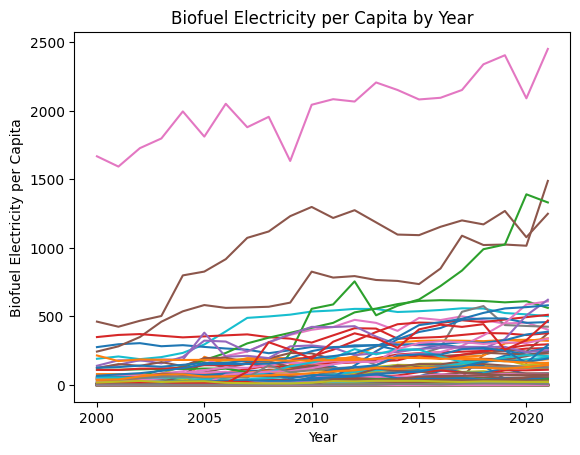

In [62]:
import matplotlib.pyplot as plt
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['biofuel_elec_per_capita'])

# Add title and axis labels
plt.title('Biofuel Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Biofuel Electricity per Capita')

Text(0, 0.5, 'Hydro Electricity per Capita')

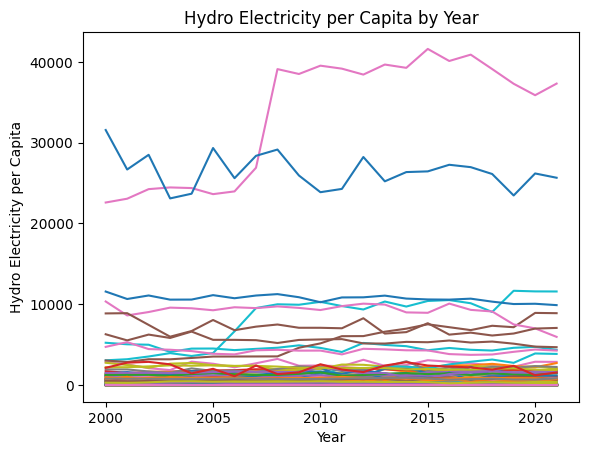

In [63]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['hydro_elec_per_capita'])

# Add title and axis labels
plt.title('Hydro Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Hydro Electricity per Capita')

Text(0, 0.5, 'coal per capita')

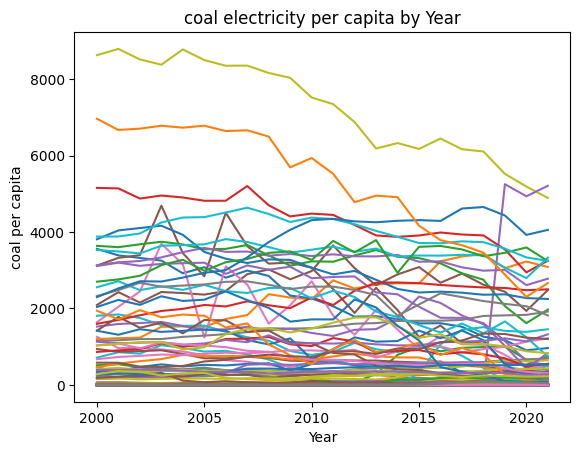

In [66]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['coal_elec_per_capita'])

# Add title and axis labels
plt.title('coal electricity per capita by Year')
plt.xlabel('Year')
plt.ylabel('coal per capita')

Text(0, 0.5, 'Oil Electricity per Capita')

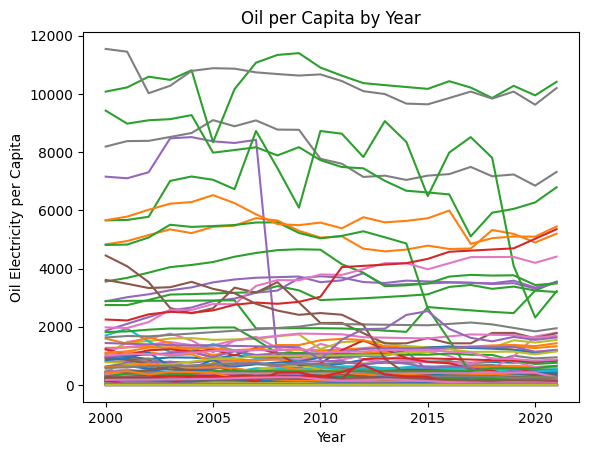

In [69]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['oil_elec_per_capita'])

# Add title and axis labels
plt.title('Oil per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Oil Electricity per Capita')

Text(0, 0.5, 'Solar Electricity per Capita')

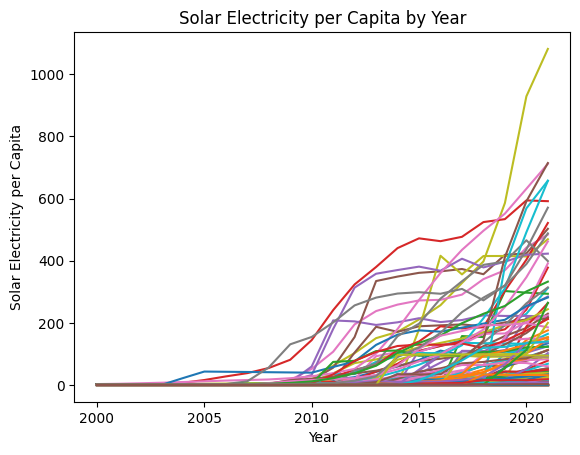

In [62]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['solar_elec_per_capita'])

# Add title and axis labels
plt.title('Solar Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Solar Electricity per Capita')

Text(0, 0.5, 'Wind Electricity per Capita')

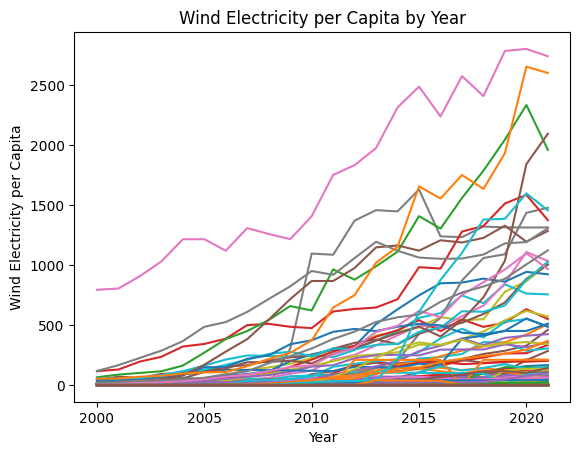

In [63]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['wind_elec_per_capita'])

# Add title and axis labels
plt.title('Wind Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Wind Electricity per Capita')

Text(0, 0.5, 'other_renewables_elec_per_capita_exc_biofuel per Capita')

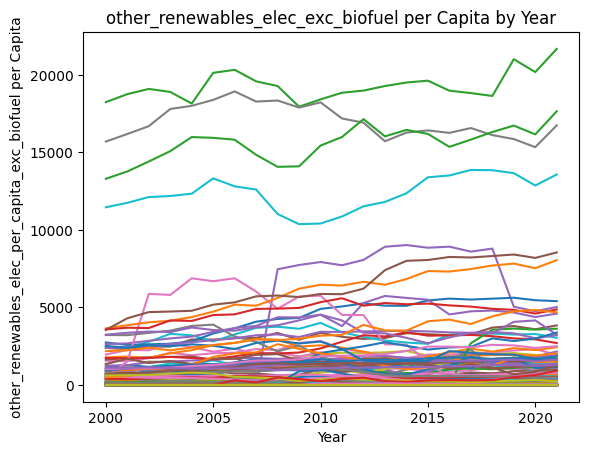

In [76]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['gas_elec_per_capita'])

# Add title and axis labels
plt.title('other_renewables_elec_exc_biofuel per Capita by Year')
plt.xlabel('Year')
plt.ylabel('other_renewables_elec_per_capita_exc_biofuel per Capita')

Text(0, 0.5, 'Nuclear Electricity per Capita')

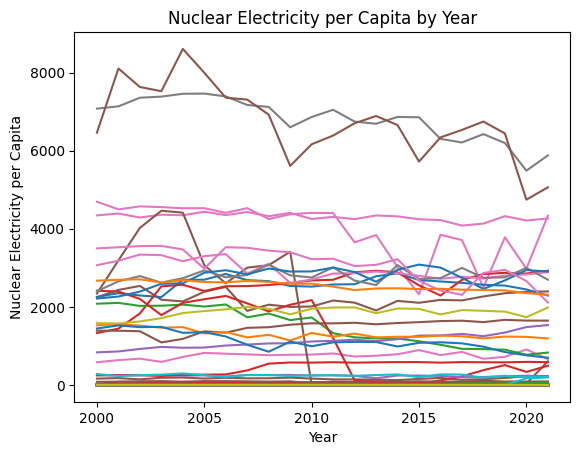

In [74]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['nuclear_elec_per_capita'])

# Add title and axis labels
plt.title('Nuclear Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel(' Electricity per Capita')

Text(0, 0.5, 'Gas Electricity per Capita')

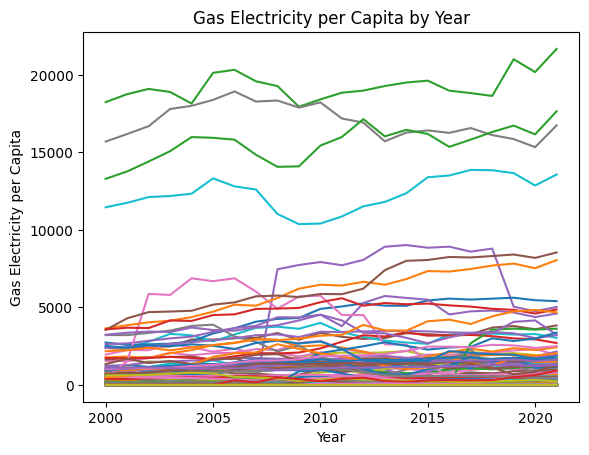

In [75]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['gas_elec_per_capita'])

# Add title and axis labels
plt.title('Gas Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Gas Electricity per Capita')

Text(0, 0.5, 'GDP_per_capita')

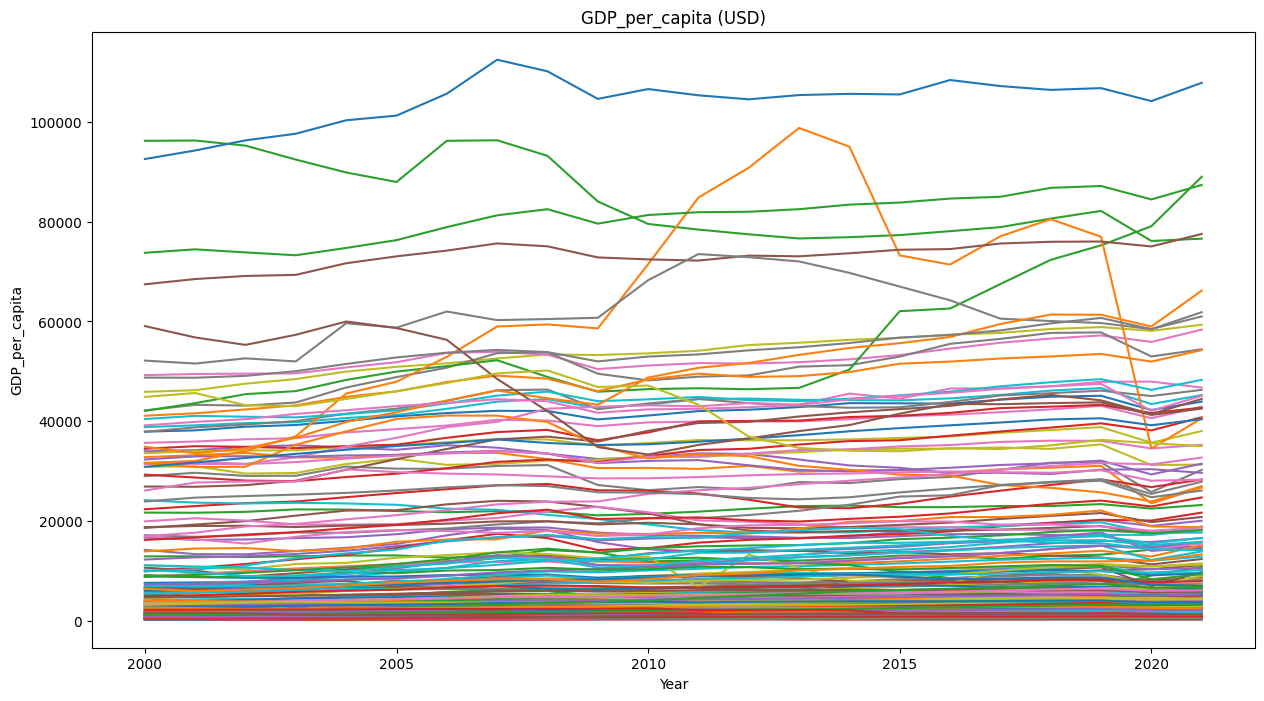

In [64]:
plt.figure(figsize=(15, 8))

for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['GDP_per_capita'])

# Add title and axis labels
plt.title('GDP_per_capita (USD)')
plt.xlabel('Year')
plt.ylabel('GDP_per_capita')

# Outliers

In [77]:
import seaborn as sns

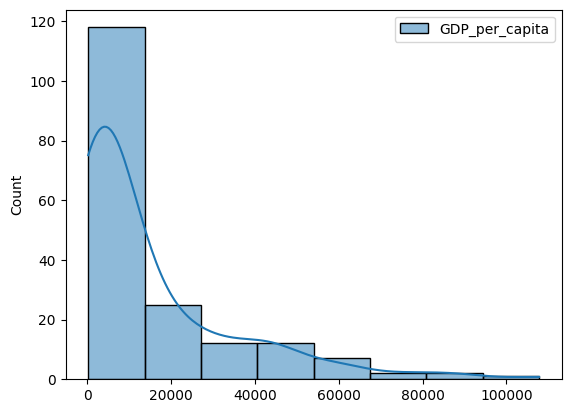

In [78]:
sns.histplot(selected_df[selected_df.year==2021][['GDP_per_capita']], bins = 8, kde=True);

In [80]:
selected_df.describe()

,year,coal_elec_per_capita,oil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,biofuel_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita
count,3938.000000,3938.000000,3938.00000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000
mean,2010.500000,472.405616,726.51700,966.425424,946.089192,315.488784,66.290966,76.299966,22.597806,76.734093
std,6.345094,1126.445782,1708.14611,2627.879424,3526.439125,1029.028457,204.161827,936.176851,76.509051,262.611694
min,2000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,18.58800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.500000,0.000000,123.79550,0.000000,86.581500,0.000000,0.186500,0.000000,0.000000,0.000000
75%,2016.000000,254.221500,458.81250,831.668000,570.361500,0.000000,34.418750,0.000000,2.101250,10.258500
max,2021.000000,8789.417000,11547.41600,21677.535000,41622.867000,8605.923000,2453.043000,17027.861000,1081.745000,2803.126000


In [81]:
selected_df[selected_df.year==2021][['GDP_per_capita']]

,GDP_per_capita
21,426.030015
64,3943.171983
86,14396.368558
108,2299.640572
130,14692.415621
...,...
3943,3327.780263
3965,2573.307716
3987,1303.240945
4009,1257.934757


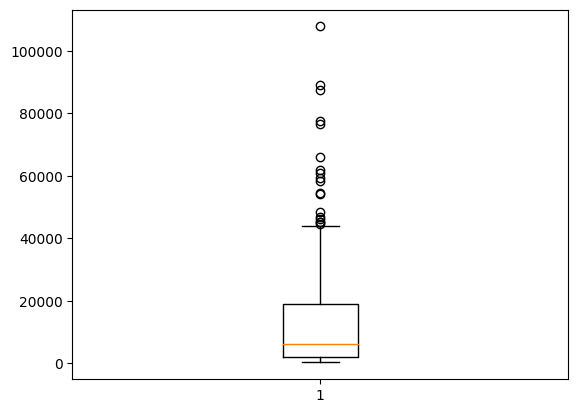

In [82]:
plt.boxplot(selected_df[selected_df.year==2021][['GDP_per_capita']]);

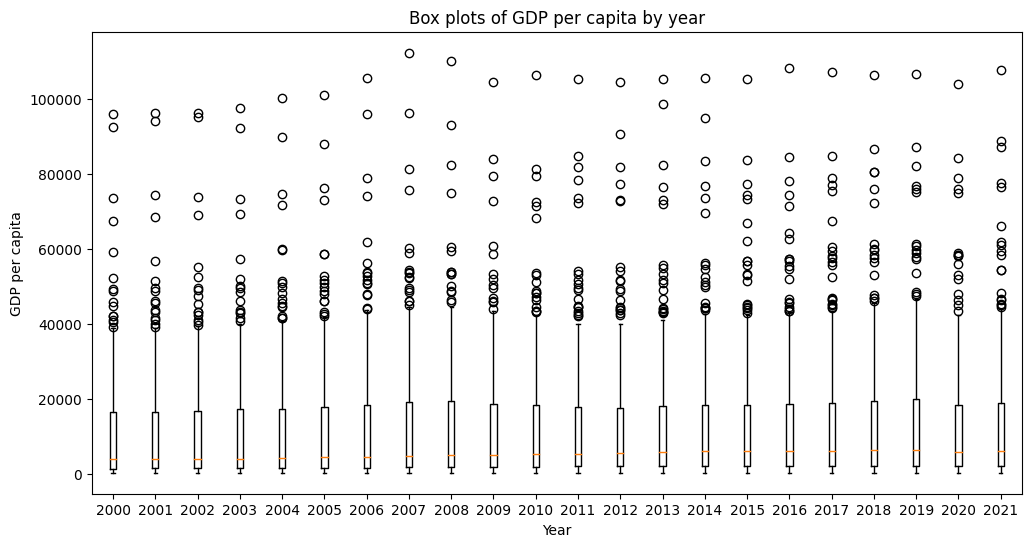

In [83]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['GDP_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

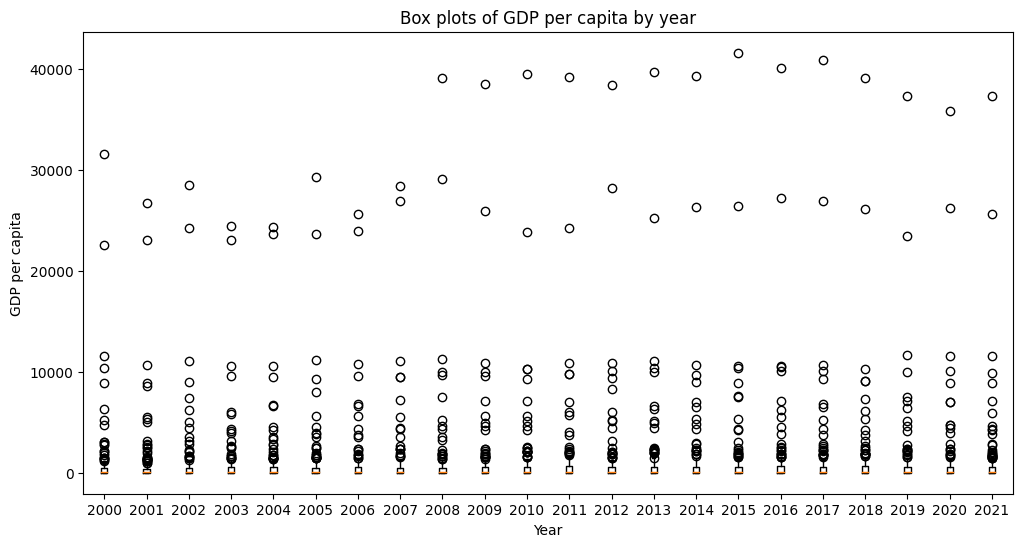

In [71]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['hydro_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

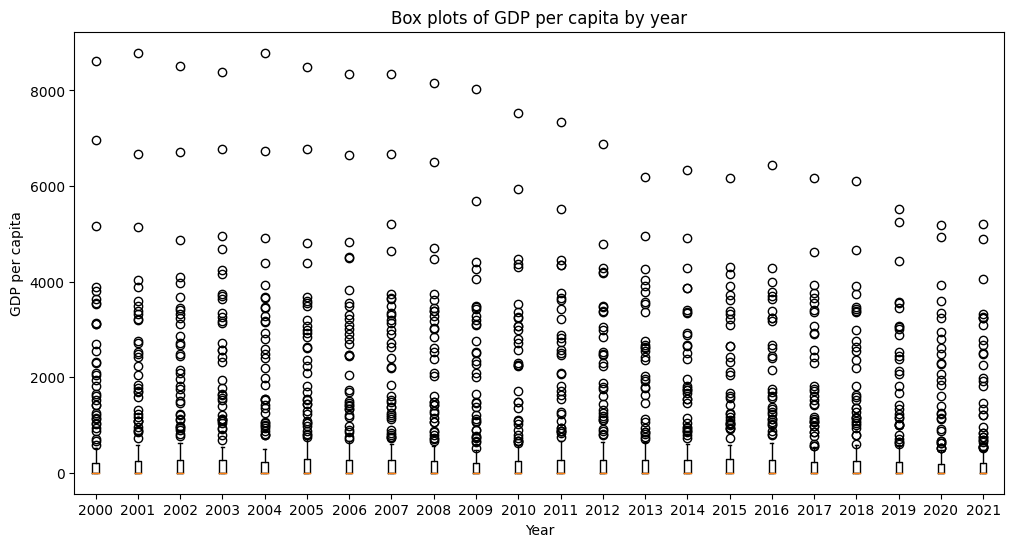

In [84]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['coal_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

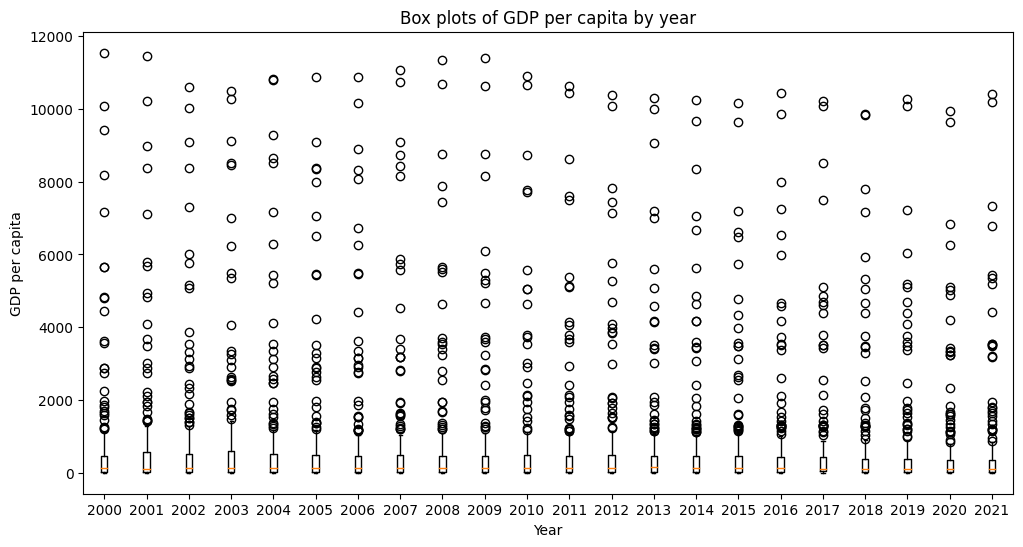

In [85]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['oil_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

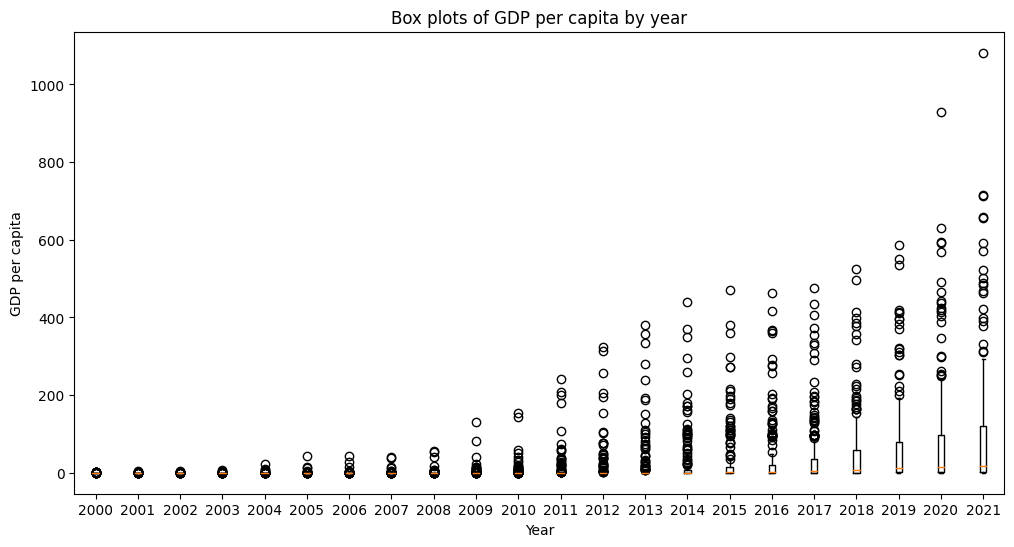

In [74]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['solar_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

In [75]:
selected_df = selected_df.copy()
selected_df['GDP_per_capita'] = selected_df['GDP_per_capita'].astype(float)


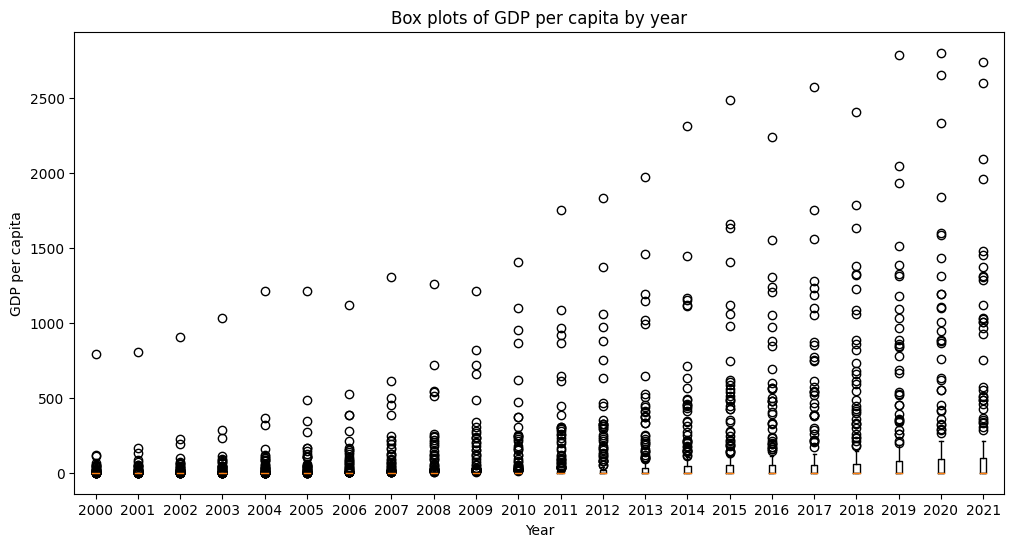

In [76]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['wind_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

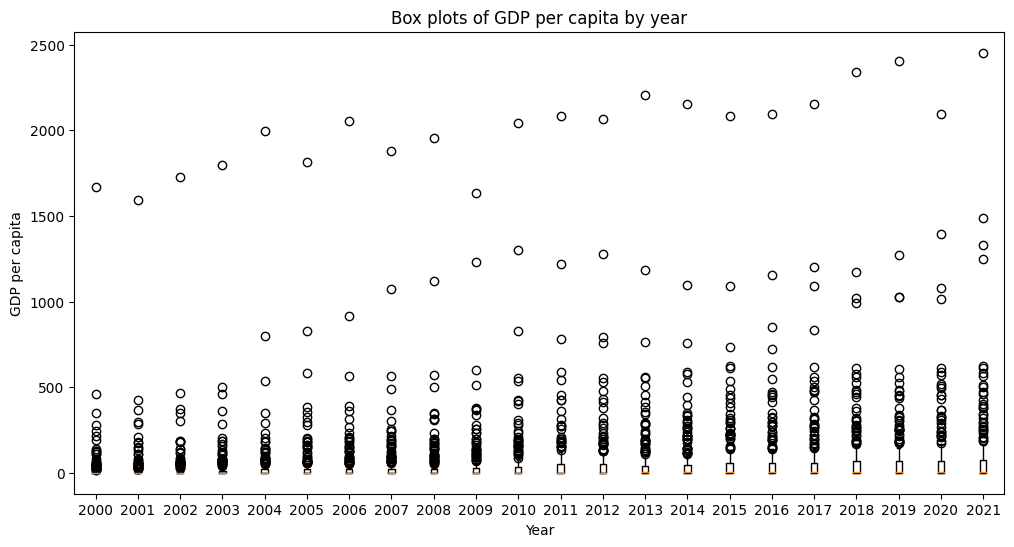

In [77]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['biofuel_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

In [86]:
selected_df[selected_df.year==2021].sort_values(by='GDP_per_capita').head(50)[['country', 'year', 'GDP_per_capita']]

,country,year,GDP_per_capita
639,Burundi,2021,261.01938
771,Central African Republic,2021,370.675749
2257,Malawi,2021,389.378819
21,Afghanistan,2021,426.030015
2235,Madagascar,2021,442.121604
1016,Democratic Republic of Congo,2021,501.239067
2672,Niger,2021,507.71113
2495,Mozambique,2021,573.112663
793,Chad,2021,595.663785
1613,Guinea-Bissau,2021,613.89811


In [79]:
selected_df

,country,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.000,15.862,0.10,24.050,0.000,0.0,368.187174
1,Afghanistan,2001,0.000,25.395,0.10,29.967,0.000,0.0,378.391401
2,Afghanistan,2002,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4181,Zimbabwe,2017,21.693,269.132,2.22,498.268,0.678,0.0,1421.240770
4182,Zimbabwe,2018,25.910,335.499,1.02,610.542,1.329,0.0,1462.590280
4183,Zimbabwe,2019,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4184,Zimbabwe,2020,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


# Pre-processing the features

## Splitting the *final* dataset into training and testing

In [87]:
selected_df.head(3)

,country,year,coal_elec_per_capita,oil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,biofuel_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.0,8.187,0.0,15.862,0.0,0.0,0.0,0.0,0.0,368.187174
1,Afghanistan,2001,0.0,4.571,0.0,25.395,0.0,0.0,0.0,0.0,0.0,378.391401
2,Afghanistan,2002,0.0,6.190,0.0,26.666,0.0,0.0,0.0,0.0,0.0,359.766343


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Split full final into training and testing datasets

selected_df_train, selected_df_test = train_test_split(selected_df, test_size=0.3, random_state=0)

## Scaling *final* dataset

In [91]:
# Creating Pipeline for scaling only the features, passing through the target and the reference columns country/year

columns_to_scale = ['coal_elec_per_capita', 
                    'oil_elec_per_capita', 
                    'gas_elec_per_capita', 
                    'hydro_elec_per_capita', 
                    'nuclear_elec_per_capita', 
                    'biofuel_elec_per_capita', 
                    'other_renewables_elec_per_capita_exc_biofuel', 
                    'solar_elec_per_capita', 
                    'wind_elec_per_capita']

ct_final = ColumnTransformer([
                ("scale", MinMaxScaler(), columns_to_scale)],
                remainder = "passthrough"
)

In [92]:
# Fit and transforming the scaling on final train dataset

selected_df_train_scaled = pd.DataFrame(ct_final.fit_transform(selected_df_train),
            columns=ct_final.get_feature_names_out())
selected_df_train_scaled.head(3)

,scale__coal_elec_per_capita,scale__oil_elec_per_capita,scale__gas_elec_per_capita,scale__hydro_elec_per_capita,scale__nuclear_elec_per_capita,scale__biofuel_elec_per_capita,scale__other_renewables_elec_per_capita_exc_biofuel,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.0,0.788117,0.0117,0.000358,0.0,0.009123,0.0,0.0,0.02395,Estonia,2007,17459.098314
1,0.304435,0.003186,0.006744,0.040087,0.323919,0.02055,0.0,0.0,0.0,Slovenia,2002,17301.933807
2,0.0,0.0,0.0,0.000363,0.0,0.0,0.0,0.0,0.0,Burundi,2007,298.936667


In [93]:
# Transforming the scaling on test test dataset

selected_df_test_scaled = pd.DataFrame(ct_final.transform(selected_df_test),
            columns=ct_final.get_feature_names_out())
selected_df_test_scaled.head(3)


,scale__coal_elec_per_capita,scale__oil_elec_per_capita,scale__gas_elec_per_capita,scale__hydro_elec_per_capita,scale__nuclear_elec_per_capita,scale__biofuel_elec_per_capita,scale__other_renewables_elec_per_capita_exc_biofuel,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.0,0.020379,0.000445,0.16773,0.551356,0.439543,0.0,0.093612,0.94717,Sweden,2020,51952.673133
1,0.045884,0.004236,0.05239,0.005748,0.0,0.0,0.0,0.0,0.0,Uzbekistan,2002,1348.763795
2,0.374163,0.0,0.196403,0.000068,0.0,0.000576,0.0,0.0,0.000504,Israel,2008,32337.197711


In [94]:
# Scaling the whole dataset:

selected_df_scaled = pd.DataFrame(ct_final.transform(selected_df),
            columns=ct_final.get_feature_names_out())
selected_df_scaled.head(3)

,scale__coal_elec_per_capita,scale__oil_elec_per_capita,scale__gas_elec_per_capita,scale__hydro_elec_per_capita,scale__nuclear_elec_per_capita,scale__biofuel_elec_per_capita,scale__other_renewables_elec_per_capita_exc_biofuel,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.0,0.000739,0.0,0.000381,0.0,0.0,0.0,0.0,0.0,Afghanistan,2000,368.187174
1,0.0,0.000413,0.0,0.00061,0.0,0.0,0.0,0.0,0.0,Afghanistan,2001,378.391401
2,0.0,0.000559,0.0,0.000641,0.0,0.0,0.0,0.0,0.0,Afghanistan,2002,359.766343


# Saving the files in local directory

In [ ]:
# # SORTING by year the FULL BASE dataset (no splitting) 
# # and SAVING it to CSV

# full_cleaned_base = full_cleaned_df_base_train_scaled.sort_values('remainder__year', ascending=True)
# full_cleaned_base.to_csv('full_cleaned_base.csv')
# full_cleaned_base.shape

In [95]:
# SAVING FULL dataset (no splitting) to CSV 

selected_df_scaled.to_csv('full_cleaned_final.csv')
selected_df_scaled.shape

(3938, 12)

In [96]:
# SAVING the TRAIN dataset

selected_df_train_scaled.to_csv('full_cleaned_final_train.csv')
selected_df_train_scaled.shape

(2756, 12)

In [97]:
# SAVING the TEST dataset

selected_df_test_scaled.to_csv('full_cleaned_final_test.csv')
selected_df_test_scaled.shape

(1182, 12)

In [98]:
if selected_df_train_scaled.shape[0] + selected_df_test_scaled.shape[0] == selected_df_scaled.shape[0]:
    print('Success')
else:
    print('Mission Failed! Try again..')

Success
